In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
df=pd.read_csv("customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [195]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [196]:
df.drop('customerID',axis='columns',inplace=True)

In [197]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [198]:
df.TotalCharges.dtype

dtype('O')

In [199]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [200]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [201]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [202]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [203]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [204]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [205]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [207]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [208]:
df1.TotalCharges.dtypes

dtype('float64')

In [210]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_Yes=df1[df1.Churn=='Yes'].tenure

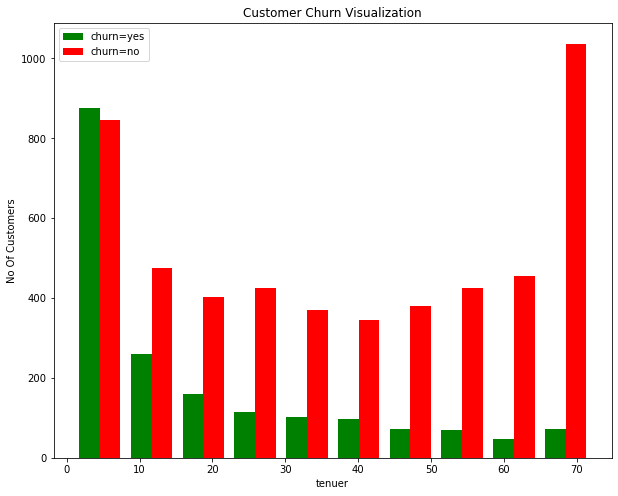

In [211]:
plt.figure(figsize=(10,8))
plt.title("Customer Churn Visualization")
plt.xlabel("tenuer")
plt.ylabel("No Of Customers")
plt.hist([tenure_churn_Yes,tenure_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [212]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_Yes=df1[df1.Churn=='Yes'].MonthlyCharges

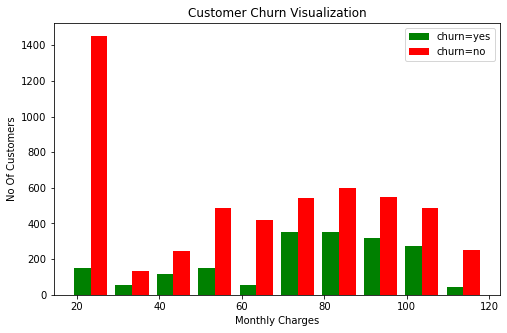

In [213]:
plt.figure(figsize=(8,5))
plt.title("Customer Churn Visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("No Of Customers")
plt.hist([tenure_churn_Yes,tenure_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [214]:
def uniqe_value(df):
    for column in df:
        if(df[column].dtypes=='object'):
             print(f'{column} : {df[column].unique()}')

In [215]:
uniqe_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [216]:
df1.replace('No internet service','No',inplace=True)

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [217]:
df1.replace('No phone service','No',inplace=True)

In [218]:
uniqe_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [219]:
df1.replace('Yes',1,inplace=True)
df1.replace('No',0,inplace=True)

In [220]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [221]:
df1.replace('Male',0,inplace=True)
df1.replace('Female',1,inplace=True)

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [222]:
uniqe_value(df1)

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [223]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [224]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [225]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6149,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5464,0,0,0,0,25,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
6123,0,0,0,0,65,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [226]:
uniqe_value(df2)

In [227]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [228]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [229]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
674,0,1,0,0,0.718310,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2751,1,0,1,1,0.253521,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6455,0,0,1,0,0.816901,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3365,0,0,0,0,0.253521,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4195,1,1,0,0,0.619718,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [230]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.216155,0.343572,0.440273,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.411650,0.474934,0.496455,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [232]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [234]:
X_train.shape

(5625, 26)

In [235]:
X_test.shape

(1407, 26)

In [236]:
import tensorflow as tf
from tensorflow import keras

In [237]:
model=keras.Sequential([
    keras.layers.Dense(22,input_shape=(26,),activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(11,activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
176/176 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.7260
Epoch 2/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7902
Epoch 3/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8027
Epoch 4/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8041
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8082
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8082
Epoch 7/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8085
Epoch 8/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8112
Epoch 9/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8119
Epoch 10/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8096

In [238]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7861


[0.446524441242218, 0.7860696315765381]

In [239]:
yp=model.predict(X_test)
yp[:5]

array([[0.17387408],
       [0.5309313 ],
       [0.01191062],
       [0.7605897 ],
       [0.42737338]], dtype=float32)

In [240]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [241]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [242]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [243]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [244]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(24.0, 0.5, 'Truth Value')

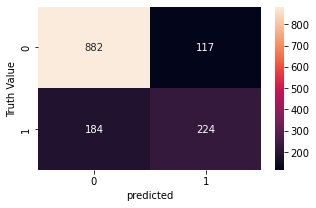

In [245]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth Value")

In [246]:
accuracy=round((878+216)/(878+216+192+121),2)
accuracy

0.78

In [247]:
#precision for class0
round((878)/(878+192),2)

0.82

In [248]:
#precision for class 1
round(216/(216+121),2)

0.64

In [249]:
#recall for class 0
round(878/(878+121),2)

0.88

In [250]:
#recall for class 1
round(216/(216+192),2)

0.53

# Exercise

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [253]:
df.shape

(10000, 14)

In [254]:
df.isnull().any().sum()

0

In [255]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [256]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [257]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [258]:
salary_exited_no=df[df.Exited==1].EstimatedSalary
salary_exited_yes=df[df.Exited==0].EstimatedSalary

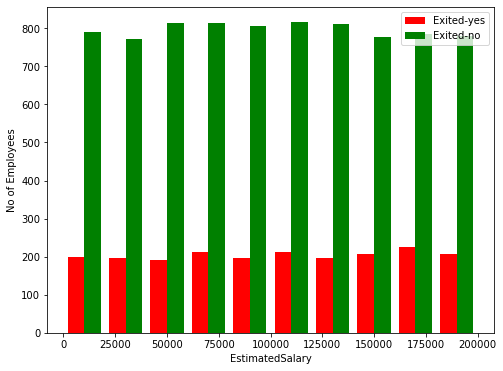

In [259]:
plt.figure(figsize=(8,6))
plt.xlabel("EstimatedSalary")
plt.ylabel("No of Employees")
plt.hist([salary_exited_no,salary_exited_yes],color=['red','green'],label=["Exited-yes","Exited-no"])
plt.legend()

In [260]:
tenure_exited_no=df[df.Exited==1].Tenure
tenure_exited_yes=df[df.Exited==0].Tenure

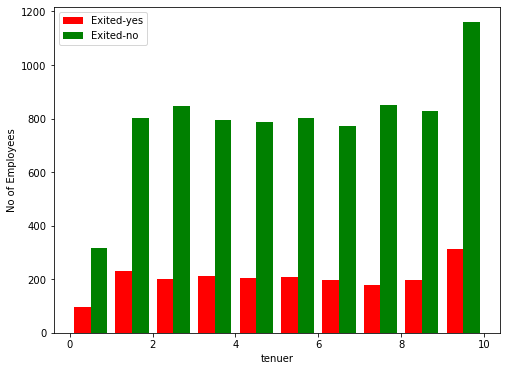

In [261]:
plt.figure(figsize=(8,6))
plt.xlabel("tenuer")
plt.ylabel("No of Employees")
plt.hist([tenure_exited_no,tenure_exited_yes],color=['red','green'],label=["Exited-yes","Exited-no"])
plt.legend()

In [262]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [263]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [264]:
df.replace('Female',1,inplace=True)
df.replace('Male',0,inplace=True)

In [265]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [266]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [267]:
col_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df1[col_scale]=sc.fit_transform(df[col_scale])
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3365,0.642,1,0.216216,0.5,0.521841,4,1,1,0.141147,1,0,0,1
7758,0.722,0,0.310811,0.3,0.000000,2,1,1,0.968772,0,1,0,0
6920,0.588,0,0.270270,0.3,0.000000,2,1,1,0.399622,0,1,0,0
9543,0.594,1,0.229730,0.6,0.449062,1,0,1,0.612922,0,1,0,0
6579,0.292,1,0.243243,0.7,0.000000,2,0,0,0.540485,0,1,0,0


In [268]:
y=df1.Exited
X=df1.drop('Exited',axis='columns')

In [269]:
X.shape

(10000, 12)

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [271]:
len(X_train)

6700

In [272]:
import tensorflow as tf
from tensorflow import keras

In [273]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)


Epoch 1/50
210/210 [==============================] - 1s 2ms/step - loss: 0.5994 - accuracy: 0.7649
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8006
Epoch 3/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8012
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8066
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8081
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8109
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8155
Epoch 8/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8167
Epoch 9/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8204
Epoch 10/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8216

In [274]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8521


[0.356039434671402, 0.8521212339401245]

In [276]:
yp=model.predict(X_test)
yp[:5]

array([[0.2428082 ],
       [0.47826248],
       [0.13526562],
       [0.46952522],
       [0.2800151 ]], dtype=float32)

In [277]:
y_pred=[]
for i in yp:
    if(i>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [278]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [279]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2599
           1       0.77      0.43      0.55       701

    accuracy                           0.85      3300
   macro avg       0.82      0.70      0.73      3300
weighted avg       0.84      0.85      0.84      3300



In [280]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(33.0, 0.5, 'Truth_value')

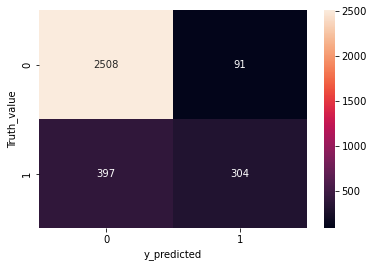

In [281]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("y_predicted")
plt.ylabel("Truth_value")

In [283]:
df1.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object